<a href="https://colab.research.google.com/github/RowlandOshiotse/RowlandOshiotse/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [2]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [5]:
X_train[0][0].shape

(32, 3)

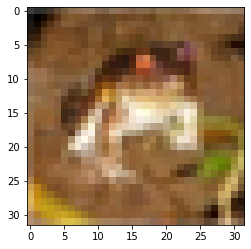

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
y_train[0].shape

(1,)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


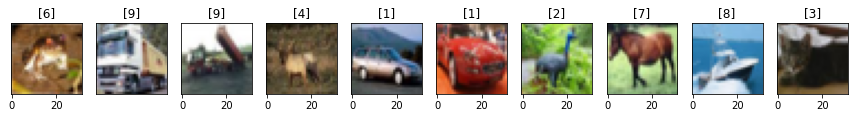

In [9]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(15,5))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap= "gray")
    axes[1].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

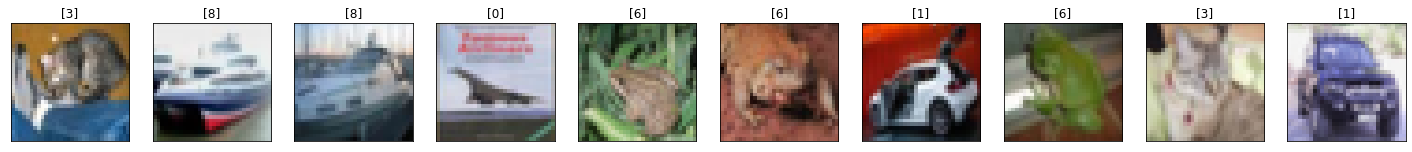

In [10]:
fig, axes = plt.subplots(ncols =10, sharex=False,
                         sharey=False, figsize=(25,5))
for i in range(10):
  axes[i].set_title(y_test[i])
  axes[i].imshow(X_test[i],cmap ="gray")
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [11]:
class_names = ["frog", "truck", "tipper", "deer", "car", "car", "bird", "horse", "boat","cat"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'frog'),
  Text(0, 0, 'truck'),
  Text(0, 0, 'tipper'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'car'),
  Text(0, 0, 'car'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'boat'),
  Text(0, 0, 'cat')]]

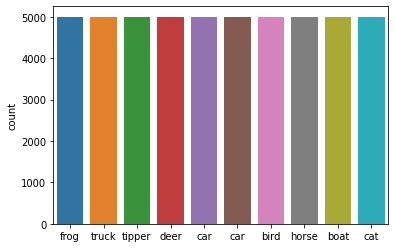

In [12]:
plt.figsize=(25,5)
p = sns.countplot(y_train.flatten())
p.set(xticklabels=class_names)

In [13]:
X_train.shape[0]

50000

In [14]:
X_train[0].shape

(32, 32, 3)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train[0].dtype

dtype('uint8')

In [17]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
model = Sequential()

In [21]:
conv_1 = Conv2D(filters =32, kernel_size =3, strides= 1, padding= "same", activation="relu", input_shape =(32,32,3))

model.add(conv_1)



In [22]:
conv2 = Conv2D(filters =64, kernel_size =3, strides =1, padding= "valid", activation = "relu")
model.add(conv2)

In [23]:
mpl = MaxPool2D(pool_size =(2,2))

In [24]:
model.add(mpl)

In [25]:
conv3 =Conv2D(filters=128, kernel_size =3, strides =1, padding ="same", activation ="relu")
model.add(conv3)

In [26]:
mpl2 = MaxPool2D(pool_size=(2,2))
model.add(mpl2)

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(100, activation="relu",))
model.add(Dense(50, activation ="relu" ))
model.add(Dense(10, activation = "softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [30]:
model.compile(loss= "sparse_categorical_crossentropy", metrics =["accuracy"], optimizer="adam")

In [31]:
model.fit(X_train, y_train, batch_size= 128, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
391/391 [==============================] - 19s 21ms/step - loss: 1.4412 - accuracy: 0.4762 - val_loss: 1.0968 - val_accuracy: 0.6098
Epoch 2/8
391/391 [==============================] - 5s 14ms/step - loss: 0.9806 - accuracy: 0.6574 - val_loss: 0.8996 - val_accuracy: 0.6853
Epoch 3/8
391/391 [==============================] - 5s 13ms/step - loss: 0.7978 - accuracy: 0.7240 - val_loss: 0.8505 - val_accuracy: 0.7078
Epoch 4/8
391/391 [==============================] - 5s 14ms/step - loss: 0.6765 - accuracy: 0.7651 - val_loss: 0.7819 - val_accuracy: 0.7292
Epoch 5/8
391/391 [==============================] - 5s 13ms/step - loss: 0.5725 - accuracy: 0.8010 - val_loss: 0.7357 - val_accuracy: 0.7451
Epoch 6/8
391/391 [==============================] - 5s 14ms/step - loss: 0.4821 - accuracy: 0.8297 - val_loss: 0.7627 - val_accuracy: 0.7458
Epoch 7/8
391/391 [==============================] - 5s 14ms/step - loss: 0.4092 - accuracy: 0.8569 - val_loss: 0.7745 - val_accuracy: 0.7523
Epoch

In [32]:
model.history.history

{'loss': [1.441152811050415,
  0.9806246757507324,
  0.7978365421295166,
  0.6765486598014832,
  0.5725467801094055,
  0.4821335971355438,
  0.409164696931839,
  0.31889012455940247],
 'accuracy': [0.47617998719215393,
  0.6574400067329407,
  0.7240200042724609,
  0.7650799751281738,
  0.8010200262069702,
  0.8297200202941895,
  0.8569200038909912,
  0.8891400098800659],
 'val_loss': [1.096827507019043,
  0.8995985388755798,
  0.850471556186676,
  0.7819359302520752,
  0.7357053756713867,
  0.7627262473106384,
  0.774474561214447,
  0.8773058652877808],
 'val_accuracy': [0.6097999811172485,
  0.6852999925613403,
  0.7077999711036682,
  0.729200005531311,
  0.7451000213623047,
  0.7458000183105469,
  0.7523000240325928,
  0.7444000244140625]}

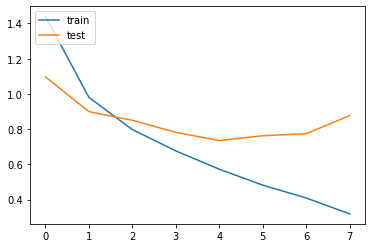

In [33]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.legend(["train", "test"], loc="upper left")

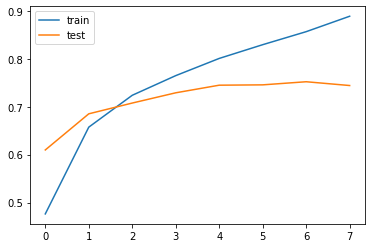

In [34]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.legend(["train", "test"], loc="upper left")

In [35]:
import numpy as np
import tensorflow as tf

In [36]:
y_pred =model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [37]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [38]:
y_true = np.argmax(y_test, axis =1)



In [39]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

[[Text(0, 0.5, 'frog'),
  Text(0, 1.5, 'truck'),
  Text(0, 2.5, 'tipper'),
  Text(0, 3.5, 'deer'),
  Text(0, 4.5, 'car'),
  Text(0, 5.5, 'car'),
  Text(0, 6.5, 'bird'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'boat'),
  Text(0, 9.5, 'cat')],
 [Text(0.5, 0, 'frog'),
  Text(1.5, 0, 'truck'),
  Text(2.5, 0, 'tipper'),
  Text(3.5, 0, 'deer'),
  Text(4.5, 0, 'car'),
  Text(5.5, 0, 'car'),
  Text(6.5, 0, 'bird'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'boat'),
  Text(9.5, 0, 'cat')]]

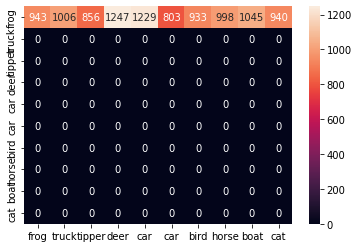

In [42]:
class_names = ["frog", "truck", "tipper", "deer", "car", "car", "bird", "horse", "boat","cat"]
plt.figsize=(20,9)
c= sns.heatmap(confusion_mtx, annot = True, fmt ="g")
c.set(xticklabels= class_names, yticklabels =class_names)